In [17]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("games.csv")
df.head()

,name,first_release_date,cover,total_rating,has_reliable_votes,age_rattings,developer_company,developer_country,publisher_company,publisher_country,...,generation_platform,game_type,game_modes,player_perspectives,genres,has_collections,remake,remaster,early_access,dlcs
0,Retaliate,2024-07-15,//images.igdb.com/igdb/image/upload/t_thumb/co...,76.0,False,Everyone,['Romans I XVI Gaming'],['United States'],['Romans I XVI Gaming'],['United States'],...,8,Main Game,['Single player'],['Bird view / Isometric'],"['Shooter', 'Indie', 'Arcade']",False,False,False,False,0
1,MX vs. ATV: Supercross - Encore,2015-10-27,//images.igdb.com/igdb/image/upload/t_thumb/co...,35.0,True,Everyone,['Rainbow Studios'],['United States'],['Nordic Games Publishing'],['Unknown(40)'],...,8,Main Game,"['Single player', 'Multiplayer']","['First person', 'Third person']","['Racing', 'Simulator', 'Sport']",True,False,False,False,7
2,Super Hipster Lumberjack,2015-07-20,//images.igdb.com/igdb/image/upload/t_thumb/co...,80.0,False,Everyone,['Unknown'],['Unknown'],['Unknown'],['Unknown'],...,0,Main Game,['Single player'],['Unknown'],"['Platform', 'Indie']",False,False,False,False,0
3,Trianga's Project: Battle Splash 2.0,2023-09-26,//images.igdb.com/igdb/image/upload/t_thumb/co...,70.0,False,Everyone,['Unknown'],['Unknown'],['Unknown'],['Unknown'],...,0,Main Game,"['Single player', 'Multiplayer', 'Co-operative']","['First person', 'Third person']","['Shooter', 'Sport', 'Indie']",False,False,False,False,1
4,Steel Sword Story,2019-06-21,//images.igdb.com/igdb/image/upload/t_thumb/co...,70.0,False,Everyone,"['8bits Fanatics', 'Kadokawa Corporation']","[None, 'Japan']",['PLAYISM'],['Japan'],...,0,Main Game,['Single player'],['Side view'],"['Adventure', 'Indie']",False,False,False,False,0


In [ ]:
df_pie = df[["total_rating","has_collections","has_reliable_votes"]].copy()

df_stock = df["game_modes"].apply(lambda x: ast.literal_eval(x))
df_pie["has_single_player"] = df_stock.apply(lambda modes: len(modes) == 1 and modes[0] == "Single Player")
df_pie["has_multi"] = df_stock.apply(lambda modes: len(modes) == 1 and modes[0] in ["Multiplayer", "Co-operative"])
df_pie["has_both"] = df_stock.apply(lambda modes: len(modes) >= 2 and any(m in ["Single Player", "Multiplayer", "Co-operative"] for m in modes))
df_pie["has_other"] = df_stock.apply(lambda modes: not (len(modes) == 1 and modes[0] == "Single Player") and not (len(modes) == 1 and modes[0] in ["Multiplayer", "Co-operative"]) and not (len(modes) >= 2 and any(m in ["Single Player", "Multiplayer", "Co-operative"] for m in modes)))

df_pie["age_everyone"] = df["age_rattings"] == "Everyone"
df_pie["age_child"] = df["age_rattings"] == "Child"
df_pie["age_teen"] = df["age_rattings"] == "Teen"
df_pie["age_young"] = df["age_rattings"] == "Young"
df_pie["age_18plus"] = df["age_rattings"] == "18+"

df_pie = df_pie.sort_values(by="total_rating", ascending=False)

In [44]:
df_pie["has_collections"].mean() * 100

np.float64(33.793389000069006)

In [36]:
df_pie.head()

,total_rating,has_collections,has_reliable_votes,has_single_player,has_multi,has_both,has_other,age_everyone,age_child,age_teen,age_young,age_18plus
5673,100.0,True,False,False,False,False,True,False,False,True,False,False
24216,100.0,False,False,False,False,False,True,True,False,False,False,False
14442,100.0,False,False,False,False,False,True,False,False,True,False,False
11833,100.0,False,False,False,False,False,True,False,True,False,False,False
10603,100.0,False,False,False,False,False,True,False,False,True,False,False


In [51]:
def camembert_top_rating(df, number, categories, excluded_categories=False):
    """
    Displays a nice pie chart showing the percentage of 'Yes' (True) values
    for multiple boolean categories.
    """

    print("\n=== START CAMEMBERT DEBUG ===")
    # Copy DataFrame
    filtered_df = df.copy()
    print("Initial df shape:", df.shape)

    if excluded_categories:
        filtered_df = filtered_df[filtered_df["has_reliable_votes"] == True]
        print("After filtering reliable votes, shape:", filtered_df.shape)

    # Take top N rows
    filtered_df = filtered_df.head(number)
    print(f"After taking top {number} rows, shape:", filtered_df.shape)
    print("Top rows:\n", filtered_df.head(100))  # Affiche les 10 premières lignes

    # Check types
    print("\nColumn types:")
    print(filtered_df[categories].dtypes)

    # Calculate percentages
    percentages = {}
    for col in categories:
        val_true = filtered_df[col].mean() * 100
        val_false = 100 - val_true
        values = [val_true, val_false]
        labels = [f"{col} True", f"{col} False"]

        fig, ax = plt.subplots(figsize=(5,5), dpi=80)
        wedges = ax.pie(
            values,
            labels=None,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops={'edgecolor':'white'},
            textprops={'fontsize':10, 'color':'black'}
        )
        ax.legend(wedges, labels, title="Categories", bbox_to_anchor=(1,0.5), fontsize=10)
        ax.set_title(f"{col} - Top {number}", fontsize=12)
        plt.tight_layout()
        plt.show()

    labels = list(percentages.keys())
    values = list(percentages.values())
    print("Final percentages dict:", percentages)

    # Plot pie chart
    fig, ax = plt.subplots(figsize=(5,5), dpi=80) 
    wedges = ax.pie(
        values,
        labels=None, 
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor':'white'},
        textprops={'fontsize':10, 'color':'black'}
    )

    # Légende à droite
    ax.legend(wedges, labels, title="Categories", bbox_to_anchor=(1,0.5), fontsize=10)

    # Titre plus petit
    ax.set_title(f"Top {number}", fontsize=12)

    plt.tight_layout()
    print("=== END CAMEMBERT DEBUG ===\n")
    return filtered_df


In [52]:
category_map = {
            "has_collections": ["has_collections"],
            "game_modes": ["has_single_player", "has_multi", "has_both", "has_other"],
            "age_ratings": ["age_everyone", "age_child", "age_teen", "age_young", "age_18plus"]
        }


=== START CAMEMBERT DEBUG ===
Initial df shape: (28982, 12)
After filtering reliable votes, shape: (6500, 12)
After taking top 100 rows, shape: (100, 12)
Top rows:
        total_rating  has_collections  has_reliable_votes  has_single_player  \
5894      95.816160             True                True              False   
28614     95.385847             True                True              False   
5630      95.277457             True                True              False   
5647      95.124366             True                True              False   
13200     94.628149             True                True              False   
...             ...              ...                 ...                ...   
12429     89.929149             True                True              False   
1728      89.875403             True                True              False   
5921      89.870775            False                True              False   
15464     89.839143            False        

C:\Users\hassa\AppData\Local\Temp\ipykernel_31380\65058307.py:42: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  ax.legend(wedges, labels, title="Categories", bbox_to_anchor=(1,0.5), fontsize=10)


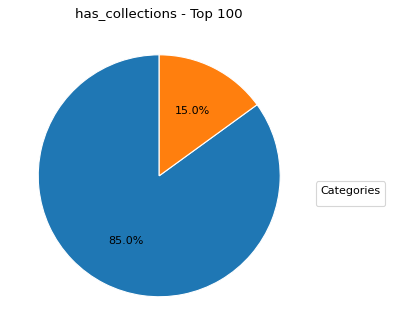

Final percentages dict: {}
=== END CAMEMBERT DEBUG ===



,total_rating,has_collections,has_reliable_votes,has_single_player,has_multi,has_both,has_other,age_everyone,age_child,age_teen,age_young,age_18plus
5894,95.816160,True,True,False,False,True,False,False,False,False,True,False
28614,95.385847,True,True,False,False,True,False,False,False,False,False,True
5630,95.277457,True,True,False,False,True,False,False,False,False,False,True
5647,95.124366,True,True,False,False,False,True,False,False,True,False,False
13200,94.628149,True,True,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12429,89.929149,True,True,False,False,True,False,False,False,True,False,False
1728,89.875403,True,True,False,False,False,True,False,False,True,False,False
5921,89.870775,False,True,False,False,False,True,False,False,False,False,True
15464,89.839143,False,True,False,False,False,True,False,False,True,False,False


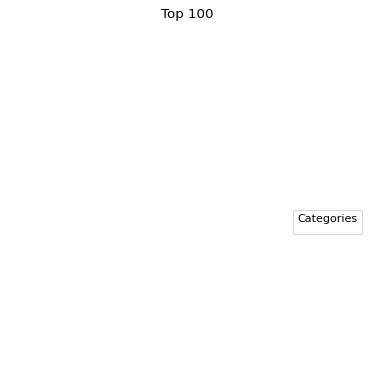

In [53]:
camembert_top_rating(df_pie, 100, category_map["has_collections"], True)